   CustomerID  gender  age  annual_income  spending_score
0           1       1   19             15              39
1           2       1   21             15              81
2           3       0   20             16               6
3           4       0   23             16              77
4           5       0   31             17              40


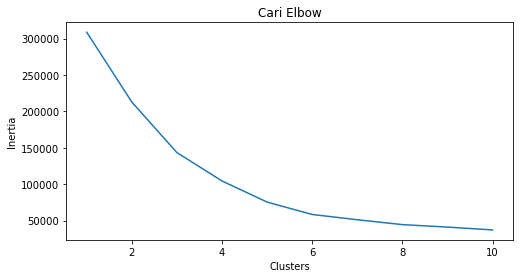

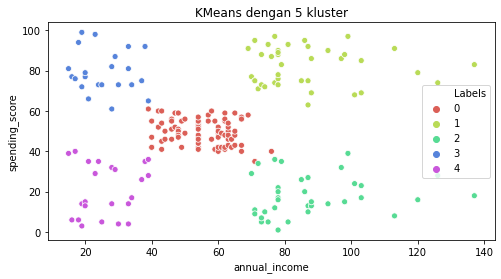

In [10]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_021a87e05013461c90578e71cd237fb4 = 'https://s3-api.us-geo.objectstorage.softlayer.net'
else:
    endpoint_021a87e05013461c90578e71cd237fb4 = 'https://s3-api.us-geo.objectstorage.service.networklayer.com'

client_021a87e05013461c90578e71cd237fb4 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='09YU4dpfFvJnZ4CeGFEfzHH0Tm_oae1skuWsS896DJQh',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_021a87e05013461c90578e71cd237fb4)

body = client_021a87e05013461c90578e71cd237fb4.get_object(Bucket='dicoding-donotdelete-pr-omfn50ikosuvlv',Key='Mall_Customers.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()

#ubah nama kolom
df = df.rename(columns={'Gender': 'gender', 'Age': 'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)': 'spending_score'})

#ubah data kategorik menjadi data numerik
df['gender'].replace(['Female','Male'], [0,1], inplace=True)
print(df.head())

#hilangkan baris untuk cust id dan gender
X = df.drop(['CustomerID', 'gender'], axis=1)

#buat list berisi inersia
clusters = []
for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)

#buat plot inersia untuk cari elbow
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

#latih kembali KMeans dengan jumlah K yang didapat melalui Elbow
#buat objek KMeans
km5 = KMeans(n_clusters=5).fit(X)

#tambahkan kolom
X['Labels'] = km5.labels_

#buat plot KMeans dengan 5 klaster
plt.figure(figsize=(8, 4))
sns.scatterplot(X['annual_income'], X['spending_score'], hue=X['Labels'], palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 kluster')
plt.show()